In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, preprocessing, pipeline, svm

# Linear SVM Classification

## Soft Margin Classification

In [2]:
iris_data = datasets.load_iris()

In [3]:
X = iris_data["data"]
y = iris_data["target"]

_prng = np.random.RandomState(42)
_steps = [("standard_scaler", preprocessing.StandardScaler()),
          ("linear_svc", svm.LinearSVC(C=1, loss="hinge", max_iter=10000, random_state=_prng))]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s


Pipeline(memory=None,
         steps=[('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2',
                           random_state=RandomState(MT19937) at 0x14B006D3C150,
                           tol=0.0001, verbose=0))],
         verbose=True)

In [4]:
svm_classifier.score(X, y)

0.9266666666666666

Can also use a non-linear SVM classifier with a linear kernel to train a linear classifier.

In [5]:
_prng = np.random.RandomState(42)
_steps = [("standard_scaler", preprocessing.StandardScaler()),
          ("svc", svm.SVC(C=1, kernel="linear", max_iter=10000, random_state=_prng))]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


Pipeline(memory=None,
         steps=[('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=10000,
                     probability=False,
                     random_state=RandomState(MT19937) at 0x14B006D3CDB0,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=True)

In [6]:
svm_classifier.score(X, y)

0.9666666666666667

Interestingly one can also use a `SGClassifier` with a "hinge" loss function and appropriately chosen value for `alpha` to train a linear SVM classifier. Although this approach will not converge as fast at the `LinearSVC`, it will work for online learning tasks or for very large data sets.

In [7]:
from sklearn import linear_model

# compute the lagrange multiplier
_n_samples, _ = X.shape
_C = 1
_alpha = 1 / (_n_samples * _C)

_prng = np.random.RandomState(42)
_steps = [("standard_scaler", preprocessing.StandardScaler()),
          ("sgd_classifier", linear_model.SGDClassifier(alpha=_alpha, loss="hinge", max_iter=10000, random_state=_prng))]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] .... (step 2 of 2) Processing sgd_classifier, total=   0.0s


Pipeline(memory=None,
         steps=[('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd_classifier',
                 SGDClassifier(alpha=0.006666666666666667, average=False,
                               class_weight=None, early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                               loss='hinge', max_iter=10000, n_iter_no_change=5,
                               n_jobs=None, penalty='l2', power_t=0.5,
                               random_state=RandomState(MT19937) at 0x14B006D3CEB8,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=True)

In [8]:
svm_classifier.score(X, y)

0.9533333333333334

# Nonlinear SVM Classification

In [9]:
def plot_dataset(ax, X, y):
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20, rotation=0)
    

def plot_predictions(ax, clf, X):
    x0s = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x1s = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    _X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(_X).reshape(x0.shape)
    y_decision = clf.decision_function(_X).reshape(x0.shape)
    ax.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    ax.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


In [10]:
_prng = np.random.RandomState(42)
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=_prng)

In [11]:
_prng = np.random.RandomState(42)

_steps = [
    ("polynomial_features", preprocessing.PolynomialFeatures(degree=3)),
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.LinearSVC(C=10, loss="hinge", max_iter=10000, random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

[Pipeline]  (step 1 of 3) Processing polynomial_features, total=   0.0s
[Pipeline] ... (step 2 of 3) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing linear_svc, total=   0.0s


Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2',
                           random_state=RandomState(MT19937) at 0x14B0048E7150,
                           tol=0.0001, verbose=0))],
         verbose=True)

In [12]:
svm_classifier.score(X, y)

0.97

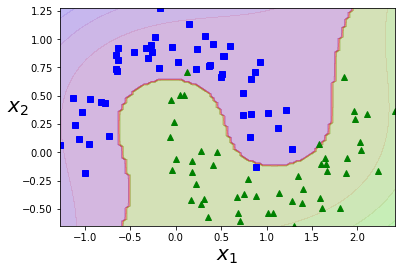

In [13]:
_, ax = plt.subplots(1, 1)
plot_predictions(ax, svm_classifier, X)
plot_dataset(ax, X, y)

## Polynomial Kernel

In [14]:
_prng = np.random.RandomState(42)

_steps = [
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.SVC(C=5, coef0=1, degree=3, kernel="poly", random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s


Pipeline(memory=None,
         steps=[('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False,
                     random_state=RandomState(MT19937) at 0x14B0048E7258,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=True)

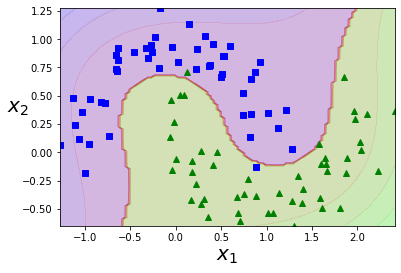

In [15]:
_, ax = plt.subplots(1, 1)
plot_predictions(ax, svm_classifier, X)
plot_dataset(ax, X, y)

In [16]:
svm_classifier.score(X, y)

0.98

In [17]:
_prng = np.random.RandomState(42)

_steps = [
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.SVC(C=5, coef0=100, degree=10, kernel="poly", max_iter=-1, random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s


Pipeline(memory=None,
         steps=[('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False,
                     random_state=RandomState(MT19937) at 0x14B0048E7360,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=True)

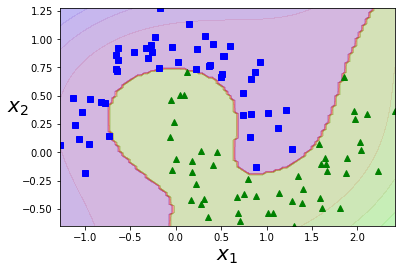

In [18]:
_, ax = plt.subplots(1, 1)
plot_predictions(ax, svm_classifier, X)
plot_dataset(ax, X, y)

In [19]:
svm_classifier.score(X, y)

1.0

## Gaussian Radial Basis Function (RBF) Kernel

Two important hyper-parameters:

1. `gamma`: increasing `gamma` decreases the variance of the Gaussian kernel (making each instance's range of influence narrower and hence the decision boundary more irregular); decreasing `gamma` increases the variance of the Gaussian kernel (making each instance's range of influence wider and hence smoothing the decision boundary).
2. `C`: this parameter is the regularization parameter for RBF SVM. The `C` parameter trades off correct classification of training examples with maximization of the decision function's margin. Higher values of `C`, a smaller margin, and thus a more irregular decision boundary, will be accepted if it leads to better classification of training examples; lower values of `C` will require a larger margin, and a smoother decision boundary, at the expense of increasing mis-classification of training examples.

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s
[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s
[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s


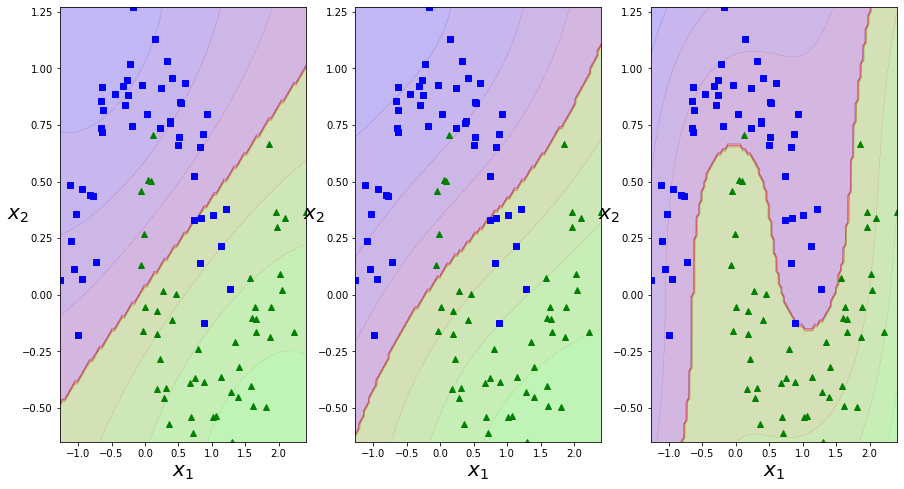

In [20]:
_prng = np.random.RandomState(42)

_steps = [
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.SVC(C=1e-3, gamma=1e-1, kernel="rbf", max_iter=-1, random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

_, axes = plt.subplots(1, 3, figsize=(15, 8))
plot_predictions(axes[0], svm_classifier, X)
plot_dataset(axes[0], X, y)

_steps = [
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.SVC(C=1, gamma=1e-1, kernel="rbf", max_iter=-1, random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

plot_predictions(axes[1], svm_classifier, X)
plot_dataset(axes[1], X, y)

_steps = [
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.SVC(C=1e3, gamma=1e-1, kernel="rbf", max_iter=-1, random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

plot_predictions(axes[2], svm_classifier, X)
plot_dataset(axes[2], X, y)

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s
[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s
[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s


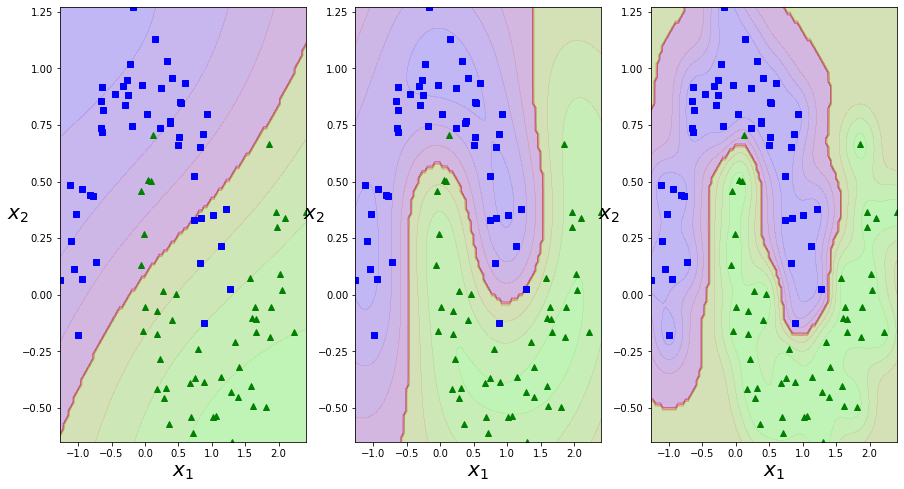

In [21]:
_prng = np.random.RandomState(42)

_steps = [
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.SVC(C=1, gamma=1e-1, kernel="rbf", max_iter=-1, random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

_, axes = plt.subplots(1, 3, figsize=(15, 8))
plot_predictions(axes[0], svm_classifier, X)
plot_dataset(axes[0], X, y)

_steps = [
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.SVC(C=1, gamma=1, kernel="rbf", max_iter=-1, random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

plot_predictions(axes[1], svm_classifier, X)
plot_dataset(axes[1], X, y)

_steps = [
    ("standard_scaler", preprocessing.StandardScaler()),
    ("linear_svc", svm.SVC(C=1, gamma=1e1, kernel="rbf", max_iter=-1, random_state=_prng))
]
svm_classifier = pipeline.Pipeline(steps=_steps, verbose=True)
svm_classifier.fit(X, y)

plot_predictions(axes[2], svm_classifier, X)
plot_dataset(axes[2], X, y)

# SVM Regression

In [22]:
_prng = np.random.RandomState(42)
_n_samples, _n_features = 50, 1
X = _prng.rand(_n_samples, _n_features)
_eps = _prng.randn(_n_samples, 1)
y = 4 + 6 * X + _eps

In [31]:
svm.LinearSVR?

Init signature:
svm.LinearSVR(
    epsilon=0.0,
    tol=0.0001,
    C=1.0,
    loss='epsilon_insensitive',
    fit_intercept=True,
    intercept_scaling=1.0,
    dual=True,
    verbose=0,
    random_state=None,
    max_iter=1000,
)
Docstring:     
Linear Support Vector Regression.

Similar to SVR with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

This class supports both dense and sparse input.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
epsilon : float, optional (default=0.0)
    Epsilon parameter in the epsilon-insensitive loss function. Note
    that the value of this parameter depends on the scale of the target
    variable y. If unsure, set ``epsilon=0``.

tol : float, optional (default=1e-4)
    Tolerance for stopping criteria.

C : float, optional (default=1.0)
    Penalty parameter 

In [49]:
_prng = np.random.RandomState(42)
linear_svr = svm.LinearSVR(epsilon=0.0, random_state=_prng)
linear_svr.fit(X, y.ravel())

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=RandomState(MT19937) at 0x14AF81579DB0, tol=0.0001,
          verbose=0)

In [50]:
linear_svr.coef_, linear_svr.intercept_

(array([5.05096429]), array([4.34470732]))

In [51]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X, y.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
linear_regression.coef_, linear_regression.intercept_

(array([5.776566]), 4.096689274468886)

In [ ]:
def plot_svr(svr, X, y, ax):
    x1s = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
    y_pred = svr.predict(x1s)
    ax.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    ax.plot(x1s, y_pred + svr.epsilon, "k--")
    ax.plot(x1s, y_pred - svr.epsilon, "k--")
    ax.scatter(X[svr.support_], y[svr.support_], s=180, facecolors='#FFAAAA')
    ax.plot(X, y, "bo")
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.legend(loc="upper left", fontsize=18)


In [53]:
_prng = np.random.RandomState(42)
_n_samples, _n_features = 100, 1
X = 2 * _prng.rand(_n_samples, _n_features) - 1
_eps = 0.1 * _prng.randn(_n_samples, 1)
y = 0.2 + 0.1 * X + 0.5 * X**2 + _eps

Text(0, 0.5, '$y$')

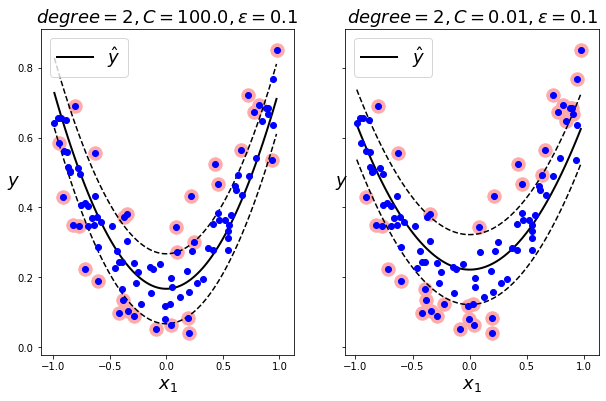

In [62]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 6), sharey=True)

_polynomial_svr = svm.SVR(C=1e2, degree=2, epsilon=0.1, gamma="scale", kernel="poly")
_polynomial_svr.fit(X, y.ravel())
plot_svr(_polynomial_svr, X, y, axes[0])
axes[0].set_title(fr"$degree={_polynomial_svr.degree}, C={_polynomial_svr.C}, \epsilon = {_polynomial_svr.epsilon}$", fontsize=18)
axes[0].set_ylabel(r"$y$", fontsize=18, rotation=0)

_polynomial_svr = svm.SVR(C=1e-2, degree=2, epsilon=0.1, gamma="scale", kernel="poly")
_polynomial_svr.fit(X, y.ravel())
plot_svr(_polynomial_svr, X, y, axes[1])
axes[1].set_title(fr"$degree={_polynomial_svr.degree}, C={_polynomial_svr.C}, \epsilon = {_polynomial_svr.epsilon}$", fontsize=18)
axes[1].set_ylabel(r"$y$", fontsize=18, rotation=0)


When $C$ is larger (i.e., less regularization!) there is a larger penalty for margin violations which means there will be fewer observations "off the street"; when $C$ is smaller (i.e., more regularization) there is a smaller penalty for margin violations which means there will be more observations "off the street".